In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
import plotly.graph_objects as go

### Création des dataframes pour chaque fichier csv avec pandas

In [2]:
#création de dataframe pour chaque fichier 'csv'
df_circuits = pd.read_csv('circuits.csv')
df_constructor_results = pd.read_csv('constructor_results.csv')
df_constructor_standings = pd.read_csv('constructor_standings.csv')
df_constructors = pd.read_csv('constructors.csv')
df_driver_standings = pd.read_csv('driver_standings.csv')
df_drivers = pd.read_csv('drivers.csv')
df_lap_times = pd.read_csv('lap_times.csv')
df_pit_stops = pd.read_csv('pit_stops.csv')
df_qualifying = pd.read_csv('qualifying.csv')
df_races = pd.read_csv('races.csv')
df_results = pd.read_csv('results.csv')
df_seasons = pd.read_csv('seasons.csv')
df_status = pd.read_csv('status.csv')

### Création d'une liste possedant tous les dataframes

In [3]:
list_df = [df_circuits,
          df_constructor_results,
          df_constructor_standings,
          df_constructors,
          df_driver_standings,
          df_drivers,
          df_lap_times,
          df_pit_stops,
          df_qualifying,
          df_races,
          df_results,
          df_seasons,
          df_status]

## Affichage des informations de chaque dataframes 

In [4]:
for i in list_df : i.head()

## Description des dataframes un à un

In [5]:
#dataframe sur les différents circuits
df_circuits.drop(columns=["url"],inplace=True)
df_circuits.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130


In [6]:
#rename columns for easiest understanding
df_circuits.rename(columns = {'circuitRef':'Ref_circuit',
                             'location':'city',
                             'lat':'latitude',
                             'lng':'longitude',
                             'alt':'altitude'},
                    inplace = True)
# afficher les nouvelles entêtes
df_circuits.head()

,circuitId,Ref_circuit,name,city,country,latitude,longitude,altitude
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130


In [7]:
#un peu de data viz 
#tout d'abord trier les circuits du moins élevé au plus élevé
df_circuits = df_circuits.sort_values(by=['altitude'])
df_circuits = df_circuits.reset_index()
df_circuits.drop(columns=["index"],inplace=True)
#df_circuits.drop(columns=["level_0"],inplace=True)
df_circuits.head()

,circuitId,Ref_circuit,name,city,country,latitude,longitude,altitude
0,73,BAK,Baku City Circuit,Baku,Azerbaijan,40.3725,49.8533,-7
1,35,yeongam,Korean International Circuit,Yeongam County,Korea,34.7333,126.4170,0
2,71,sochi,Sochi Autodrom,Sochi,Russia,43.4057,39.9578,2
3,24,yas_marina,Yas Marina Circuit,Abu Dhabi,UAE,24.4672,54.6031,3
4,72,port_imperial,Port Imperial Street Circuit,New Jersey,USA,40.7769,-74.0111,4


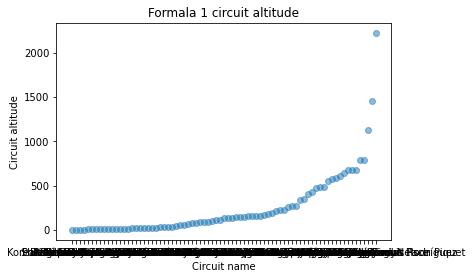

In [8]:
######graphe a modifier avec plus de detailles (rajouter une colonne continent, mettre diffrente couleur en fonction du continent, agradir le tableau pour avoir une absicse lisible)##### 
#graphe de description
plt.scatter(df_circuits['name'],df_circuits['altitude'], alpha=0.5)  # alpha chances the transparency
#titre et legendes
plt.title('Formala 1 circuit altitude')
plt.xlabel('Circuit name')
plt.ylabel('Circuit altitude')
#affichage du graph
plt.show()

A première vu le graph ci-dessus n'est pas très représentatif et compréhensible.
Pour rendre ce graph plus attractif,  nous allons créer une colonne qui donne le continent dans lequel se trouve le circuit.

In [9]:
#nous allons d'abord recuperer uniquement la colonne qui donne le pays
pays = df_circuits['country']
print("Il y a ligne", len(pays), "à la base")
#dans un second temps nous allons retirer les doublons 
#pays = set(pays)
pays = pays.drop_duplicates().reset_index()#gerons les duplications de pays comme dans un dataframe
pays = pays['country']
print("A present on voit qu'il y a", len(pays), "pays different dans en F1")

Il y a ligne 77 à la base
A present on voit qu'il y a 34 pays different dans en F1


A présent nous allons créer une liste qui regroupe tous le continent

In [10]:
continents = ['North_America', 'South_America', 'Africa', 'Asia', 'Oceania', 'Europe']

Nous allons maintenant créer un dictionnaire des continents avec les pays qui s'y trouvent

In [11]:
#dans cd dictionnaire la clé sera le pays et la value le continent pour des soucis pratiques
continents_dic = {
    'Azerbaijan' : 'Asia',
    'Korea' : 'Asia',
    'Russia' : 'Asia',
    'UAE' : 'Asia',
    'USA' : 'North_America',
    'Spain' : 'Europe',
    'China' : 'Asia',
    'Netherlands' : 'Europe',
    'Bahrain' : 'Asia',
    'Monaco' : 'Europe',
    'Argentina' : 'South_America',
    'Vietnam' : 'Asia',
    'Australia' : 'Oceania',
    'Canada' : 'North_America',
    'Saudi Arabia' : 'Asia',
    'South Africa' : 'Africa',
    'Singapore' : 'Asia',
    'Malaysia' : 'Asia',
    'Morocco' : 'Africa',
    'UK' : 'Europe',
    'Portugal' : 'Europe',
    'Belgium' : 'Europe',
    'Italy' : 'Europe',
    'Japan' : 'Asia',
    'Germany' : 'Europe',
    'France' : 'Europe',
    'Turkey' : 'Asia',
    'Sweden' : 'Europe',
    'India' : 'Asia',
    'Hungary' : 'Europe',
    'Switzerland' : 'Europe',
    'Austria' : 'Europe',
    'Brazil' : 'South_America',
    'Mexico' : 'North_America'
}
#representation des clee et value de 'continents_dic' 
print("Les clee de 'continents_dic' sont :\n",continents_dic.keys())
print('')
print("Les values de 'continents_dic' sont :\n",continents_dic.values())

Les clee de 'continents_dic' sont :
 dict_keys(['Azerbaijan', 'Korea', 'Russia', 'UAE', 'USA', 'Spain', 'China', 'Netherlands', 'Bahrain', 'Monaco', 'Argentina', 'Vietnam', 'Australia', 'Canada', 'Saudi Arabia', 'South Africa', 'Singapore', 'Malaysia', 'Morocco', 'UK', 'Portugal', 'Belgium', 'Italy', 'Japan', 'Germany', 'France', 'Turkey', 'Sweden', 'India', 'Hungary', 'Switzerland', 'Austria', 'Brazil', 'Mexico'])

Les values de 'continents_dic' sont :
 dict_values(['Asia', 'Asia', 'Asia', 'Asia', 'North_America', 'Europe', 'Asia', 'Europe', 'Asia', 'Europe', 'South_America', 'Asia', 'Oceania', 'North_America', 'Asia', 'Africa', 'Asia', 'Asia', 'Africa', 'Europe', 'Europe', 'Europe', 'Europe', 'Asia', 'Europe', 'Europe', 'Asia', 'Europe', 'Asia', 'Europe', 'Europe', 'Europe', 'South_America', 'North_America'])


In [12]:
#creation d'un dictionnaire qui attribue une couleur a un continent
couleur_dic = {
    'Asia' : '#F26230',
    'North_America' : '#223D96',
    'South_America' : '#653195',
    'Africa' : '#FEC810',
    'Oceania' : '#29AC46',
    'Europe' : '#eb242b'
}
#representation des clee et value de 'continents_dic' 
print("Les clee de 'couleur_dic' sont :\n",couleur_dic.keys())
print('')
print("Les values de 'couleur_dic' sont :\n",couleur_dic.values())

Les clee de 'couleur_dic' sont :
 dict_keys(['Asia', 'North_America', 'South_America', 'Africa', 'Oceania', 'Europe'])

Les values de 'couleur_dic' sont :
 dict_values(['#F26230', '#223D96', '#653195', '#FEC810', '#29AC46', '#eb242b'])


Il faut maintenant un introduire les valeurs de 'continents_dic' dans une nouvelle colonne de 'df_circuits'

In [13]:
#fonctin en 1 ligne (lambda) permetant d'assigner les valeurs de la nouvelle colonnes 'continents en finction de 'pays' 
df_circuits['continents'] = df_circuits.apply(lambda row: continents_dic[row['country']], axis = 1)
df_circuits['colors'] = df_circuits.apply(lambda row: couleur_dic[row['continents']], axis = 1)#dans cette colonnes les couleurs sont stoké sous forme de code
df_circuits.head()#on peut visualiser dans le df ci-dessous la nouvelle colonne 'continents' qui concorde bien avec 'pays'

,circuitId,Ref_circuit,name,city,country,latitude,longitude,altitude,continents,colors
0,73,BAK,Baku City Circuit,Baku,Azerbaijan,40.3725,49.8533,-7,Asia,#F26230
1,35,yeongam,Korean International Circuit,Yeongam County,Korea,34.7333,126.4170,0,Asia,#F26230
2,71,sochi,Sochi Autodrom,Sochi,Russia,43.4057,39.9578,2,Asia,#F26230
3,24,yas_marina,Yas Marina Circuit,Abu Dhabi,UAE,24.4672,54.6031,3,Asia,#F26230
4,72,port_imperial,Port Imperial Street Circuit,New Jersey,USA,40.7769,-74.0111,4,North_America,#223D96


## Emplacement géographique des circuits

Réalisation d'un script qui affichera l'empacement de chaque circuit sur la carte, ainsi qu'un symbole qui sera plus ou moins gros en fonction du nombre de course s'étant tenu sur celui-ci

In [14]:
#creation d'une liste des latitudes et une autre liste pour les longitude
latitudes = df_circuits['latitude']
longitudes = df_circuits['longitude']
couleurs = df_circuits['colors']

#initialisation de la map
coords = (43.4057, 39.9578)
map = folium.Map(location=coords, tiles='OpenStreetMap')

for i in range(len(latitudes)):
    folium.Circle(
        location = (latitudes[i], longitudes[i]),
        radius = 1,#nb_course[i]*2,#nombre de course aillant eu lieu sur circuit
        color = couleurs[i],
        fill = True,
#         fill_color = couleurs[i]
    ).add_to(map)
    
map


Les point sont pratiquent lorsqu'on regarde la carte du monde dans ca globalité. Or lorsqu'on regarde à l'echelle d'un continent ou meme d'un pays les points sont trop petits.
Il faudrait donc différencier les cas et garder cette carte, en rajoutant une carte par continent avec des marqueur plus visible. 

## Nettoyage des du dataframe des constructeurs

Dans ce dataframe le but va être de trié et de retirer le plus d'information possible du dataframe.

In [15]:
df_constructors.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [16]:
nb_constru = df_constructors.shape[0]
print("Il y a eu ", nb_constru, "de constructeur en F1 entre 1950 et 2021")

Il y a eu  211 de constructeur en F1 entre 1950 et 2021


In [17]:
#nous allons a present verifier s'il y a des deplicate dans les constructeurs
nom_constru = df_constructors['name']
nom_constru = nom_constru.drop_duplicates()
taille_nom_constru = len(nom_constru)

#comparaison rapide pour savoir si il y a des duplicates ou non 
if taille_nom_constru == nb_constru:
    print("Il n'y a pas de duplicates")
else: 
    print("Il y avait biend des duplicates")

Il n'y a pas de duplicates


On va commencé a regarder pour merge les dataframes des constructeurs avec celui de leur resultat

In [18]:
#visualisation du dataframe de victoie de constructeur
df_constructor_results.head()

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N


A present nous allons merge les 2 tableau a fin d'avoir les resulats par constructeurs merge par rapport au 'constructeurId'

In [19]:
#merge des dataframe 'df_constructors' avec 'df_constructors_results'
df_constructors = df_constructors.merge(df_constructor_results, how='inner', on='constructorId')
df_constructors.tail()

,constructorId,constructorRef,name,nationality,url,constructorResultsId,raceId,points,status
11815,214,alpine,Alpine F1 Team,French,http://en.wikipedia.org/wiki/Alpine_F1_Team,16276,1056,2.0,\N
11816,214,alpine,Alpine F1 Team,French,http://en.wikipedia.org/wiki/Alpine_F1_Team,16285,1057,8.0,\N
11817,214,alpine,Alpine F1 Team,French,http://en.wikipedia.org/wiki/Alpine_F1_Team,16294,1059,4.0,\N
11818,214,alpine,Alpine F1 Team,French,http://en.wikipedia.org/wiki/Alpine_F1_Team,16305,1058,2.0,\N
11819,214,alpine,Alpine F1 Team,French,http://en.wikipedia.org/wiki/Alpine_F1_Team,16315,1060,1.0,\N


Nous allons a present tenter de re-organiser le dataframe pour le rendre plus lisible

In [20]:
new_columns = ['constructorId', 
               'constructorResultsId',
               'constructorRef',
               'name',
               'nationality',
               'raceId',
               'points',
               'status',
               'url']
df_constructors = df_constructors[new_columns]
df_constructors.head()

,constructorId,constructorResultsId,constructorRef,name,nationality,raceId,points,status,url
0,1,1,mclaren,McLaren,British,18,14.0,\N,http://en.wikipedia.org/wiki/McLaren
1,1,14,mclaren,McLaren,British,19,10.0,\N,http://en.wikipedia.org/wiki/McLaren
2,1,25,mclaren,McLaren,British,20,4.0,\N,http://en.wikipedia.org/wiki/McLaren
3,1,35,mclaren,McLaren,British,21,6.0,\N,http://en.wikipedia.org/wiki/McLaren
4,1,46,mclaren,McLaren,British,22,8.0,\N,http://en.wikipedia.org/wiki/McLaren


In [21]:
#drope des duplicate pour le dataframe 'df_constructors'
df_constructors = df_constructors.drop_duplicates()
df_constructors

,constructorId,constructorResultsId,constructorRef,name,nationality,raceId,points,status,url
0,1,1,mclaren,McLaren,British,18,14.0,\N,http://en.wikipedia.org/wiki/McLaren
1,1,14,mclaren,McLaren,British,19,10.0,\N,http://en.wikipedia.org/wiki/McLaren
2,1,25,mclaren,McLaren,British,20,4.0,\N,http://en.wikipedia.org/wiki/McLaren
3,1,35,mclaren,McLaren,British,21,6.0,\N,http://en.wikipedia.org/wiki/McLaren
4,1,46,mclaren,McLaren,British,22,8.0,\N,http://en.wikipedia.org/wiki/McLaren
...,...,...,...,...,...,...,...,...,...
11815,214,16276,alpine,Alpine F1 Team,French,1056,2.0,\N,http://en.wikipedia.org/wiki/Alpine_F1_Team
11816,214,16285,alpine,Alpine F1 Team,French,1057,8.0,\N,http://en.wikipedia.org/wiki/Alpine_F1_Team
11817,214,16294,alpine,Alpine F1 Team,French,1059,4.0,\N,http://en.wikipedia.org/wiki/Alpine_F1_Team
11818,214,16305,alpine,Alpine F1 Team,French,1058,2.0,\N,http://en.wikipedia.org/wiki/Alpine_F1_Team


In [22]:
#visualisation de la forme du dataframe
df_constructors.shape
df_constructors.dtypes

constructorId             int64
constructorResultsId      int64
constructorRef           object
name                     object
nationality              object
raceId                    int64
points                  float64
status                   object
url                      object
dtype: object

### Calcule des points par équipe

Cette partie va etes dedier au nombre de pooints inscrit par chaque ecurie au cours de l'histoire de la F1

In [23]:
df_constructors.columns

Index(['constructorId', 'constructorResultsId', 'constructorRef', 'name',
       'nationality', 'raceId', 'points', 'status', 'url'],
      dtype='object')

In [24]:
#utilisation de la fonction 'groupby' sur laquelle on applique la sum sur 
result_const = df_constructors.groupby('name').agg({'points':'sum'}).reset_index()
result_const

,name,points
0,AGS,2.0
1,ATS,7.0
2,Alfa Romeo,117.0
3,AlphaTauri,155.0
4,Alpine F1 Team,32.0
...,...,...
170,Virgin,0.0
171,Watson,16.0
172,Williams,3567.0
173,Wolf,79.0


In [25]:
#le but va etre de sorte les points dans l'ordre croissant
result_const = result_const.sort_values(by=['points'])
result_const = result_const.reset_index()
# result_const.drop(columns=["index"],inplace=True)
#result_const.drop(columns=["level_0"],inplace=True)
result_const[160:]

,index,name,points
160,12,BRM,439.0
161,164,Toro Rosso,500.0
162,142,Sauber,557.0
163,19,Brabham,595.0
164,168,Tyrrell,621.0
165,93,Lotus F1,706.0
166,17,Benetton,861.5
167,158,Team Lotus,918.0
168,64,Force India,1098.0
169,140,Renault,1777.0


Graphe des meilleurs constructeurs en fonction du nombre de points marqué dans leur histoire

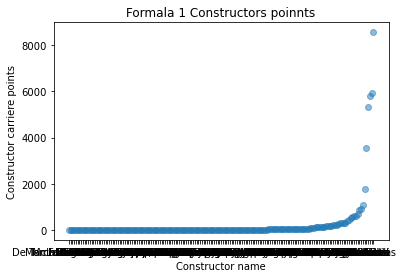

In [26]:
######graphe a modifier avec plus de detailles (rajouter une colonne continent, mettre diffrente couleur en fonction du continent, agradir le tableau pour avoir une absicse lisible)##### 
#graphe de description
plt.scatter(result_const['name'],result_const['points'], alpha=0.5)  # alpha chances the transparency
#titre et legendes
plt.title('Formala 1 Constructors poinnts')
plt.xlabel('Constructor name')
plt.ylabel('Constructor carriere points')
#affichage du graph
plt.show()

## Nous allons maintenant nous occuper de la partie 'result'

In [27]:
#visualisation de la forme du dataframe 
df_results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [28]:
#affichons la dataframe des drivers
df_drivers

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...
848,850,pietro_fittipaldi,51,FIT,Pietro,Fittipaldi,1996-06-25,Brazilian,http://en.wikipedia.org/wiki/Pietro_Fittipaldi
849,851,aitken,89,AIT,Jack,Aitken,1995-09-23,British,http://en.wikipedia.org/wiki/Jack_Aitken
850,852,tsunoda,22,TSU,Yuki,Tsunoda,2000-05-11,Japanese,http://en.wikipedia.org/wiki/Yuki_Tsunoda
851,853,mazepin,9,MAZ,Nikita,Mazepin,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin


In [29]:
#recuperation des noms prenom et id du driver
name = ['driverId', 'forename', 'surname']
driver_name = df_drivers[name]
driver_name

,driverId,forename,surname
0,1,Lewis,Hamilton
1,2,Nick,Heidfeld
2,3,Nico,Rosberg
3,4,Fernando,Alonso
4,5,Heikki,Kovalainen
...,...,...,...
848,850,Pietro,Fittipaldi
849,851,Jack,Aitken
850,852,Yuki,Tsunoda
851,853,Nikita,Mazepin


In [30]:
#réalisation d'un merge entre les dataframes drivers name et df_result
new_result = df_results.merge(driver_name, how='inner', on='driverId')  
new_result

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,forename,surname
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,Lewis,Hamilton
1,27,19,1,1,22,9,5,5,5,4.0,56,+46.548,5525103,53,3,1:35.462,209.033,1,Lewis,Hamilton
2,57,20,1,1,22,3,13,13,13,0.0,56,\N,\N,25,19,1:35.520,203.969,11,Lewis,Hamilton
3,69,21,1,1,22,5,3,3,3,6.0,66,+4.187,5903238,20,3,1:22.017,204.323,1,Lewis,Hamilton
4,90,22,1,1,22,3,2,2,2,8.0,58,+3.779,5213230,31,2,1:26.529,222.085,1,Lewis,Hamilton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25135,25062,1056,853,210,9,19,17,17,17,0.0,75,\N,\N,64,19,1:16.866,156.287,13,Nikita,Mazepin
25136,25079,1057,853,210,9,18,14,14,14,0.0,51,+14.315,8030725,40,19,1:47.747,200.569,1,Nikita,Mazepin
25137,25105,1059,853,210,9,18,20,20,20,0.0,52,\N,\N,34,20,1:39.317,211.758,11,Nikita,Mazepin
25138,25123,1058,853,210,9,20,18,18,18,0.0,68,\N,\N,39,19,1:10.951,219.092,13,Nikita,Mazepin


### Realisation d'une fonction de recupeation de stat de cours pour tous les drivers ou 1 seul 

Le but va aussi être de merge le dataframe ci-dessus avec un les circuits sur lequels ont lieu les course

Dans un premier temps recuperons les informations qui nous interresse depuis les dataframe 'circuits', 'result', 'constructor', 'race'

In [31]:
df_races.head()

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


In [32]:
#creation de la nouvelle df de race
columns_race = ['raceId', 'circuitId', 'name', 'date']
race_info = df_races[columns_race]
race_info = race_info.rename(columns={"name": "GP_name",
                                      "date" : "GP_date"})
race_info.head()

,raceId,circuitId,GP_name,GP_date
0,1,1,Australian Grand Prix,2009-03-29
1,2,2,Malaysian Grand Prix,2009-04-05
2,3,17,Chinese Grand Prix,2009-04-19
3,4,3,Bahrain Grand Prix,2009-04-26
4,5,4,Spanish Grand Prix,2009-05-10


In [33]:
#creation de la nouvelle df de cicuit
columns_circuits = ['circuitId', 'name']
circuits_info = df_circuits[columns_circuits]
circuits_info = circuits_info.rename(columns={"name": "circuit_name"})
circuits_info.head()

,circuitId,circuit_name
0,73,Baku City Circuit
1,35,Korean International Circuit
2,71,Sochi Autodrom
3,24,Yas Marina Circuit
4,72,Port Imperial Street Circuit


In [34]:
#creation de la nouvelle df de constructeur
columns_constructors = ['constructorId', 'name']
constructor_info = df_constructors[columns_constructors]
constructor_info = constructor_info.rename(columns={"name": "constructor_name"})
constructor_info.head()

,constructorId,constructor_name
0,1,McLaren
1,1,McLaren
2,1,McLaren
3,1,McLaren
4,1,McLaren


#### Les merges

Le premier merge consistera a fusionner 'circuits_info' et 'race_info' par rapport au 'circuitId'

In [35]:
#merge et changement de l'ordre des colonnes de 'race_info'
race_info = race_info.merge(circuits_info, how='inner', on='circuitId')
new_race_columns = ['raceId',
                    'GP_name',
                    'circuit_name',
                    'GP_date'] 
race_info = race_info[new_race_columns]
race_info

,raceId,GP_name,circuit_name,GP_date
0,1,Australian Grand Prix,Albert Park Grand Prix Circuit,2009-03-29
1,18,Australian Grand Prix,Albert Park Grand Prix Circuit,2008-03-16
2,36,Australian Grand Prix,Albert Park Grand Prix Circuit,2007-03-18
3,55,Australian Grand Prix,Albert Park Grand Prix Circuit,2006-04-02
4,71,Australian Grand Prix,Albert Park Grand Prix Circuit,2005-03-06
...,...,...,...,...
1053,1057,Azerbaijan Grand Prix,Baku City Circuit,2021-06-06
1054,1039,Tuscan Grand Prix,Autodromo Internazionale del Mugello,2020-09-13
1055,1042,Portuguese Grand Prix,Autódromo Internacional do Algarve,2020-10-25
1056,1054,Portuguese Grand Prix,Autódromo Internacional do Algarve,2021-05-02


Nous allons maintenant merge les df 'constructor_info', 'race_info' et 'df_result' concecutivement

In [36]:
#################################
#  ATTENTION LE TEMPS D'EXECUTION DE CETTE CELLULES ET RELATIVEMENT LONG 
#  EN RAISON DU NOMBRE D'OPERATION REALISE
################################# 
#merge avec 'circuit_info'
new_result = new_result.merge(constructor_info, how='inner', on='constructorId')  
#merge avec 'race_info'
new_result = new_result.merge(race_info, how='inner', on='raceId')
#affichage du nouveau 'new_result' et remise en ordre des indexs
new_result.drop_duplicates().reset_index()

,index,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,...,rank,fastestLapTime,fastestLapSpeed,statusId,forename,surname,constructor_name,GP_name,circuit_name,GP_date
0,0,1,18,1,1,22,1,1,1,1,...,2,1:27.452,218.300,1,Lewis,Hamilton,McLaren,Australian Grand Prix,Albert Park Grand Prix Circuit,2008-03-16
1,848,5,18,5,1,23,3,5,5,5,...,1,1:27.418,218.385,1,Heikki,Kovalainen,McLaren,Australian Grand Prix,Albert Park Grand Prix Circuit,2008-03-16
2,1696,2,18,2,2,3,5,2,2,2,...,3,1:27.739,217.586,1,Nick,Heidfeld,BMW Sauber,Australian Grand Prix,Albert Park Grand Prix Circuit,2008-03-16
3,1767,9,18,9,2,4,2,\N,R,9,...,9,1:28.753,215.100,4,Robert,Kubica,BMW Sauber,Australian Grand Prix,Albert Park Grand Prix Circuit,2008-03-16
4,1838,3,18,3,3,7,7,3,3,3,...,5,1:28.090,216.719,1,Nico,Rosberg,Williams,Australian Grand Prix,Albert Park Grand Prix Circuit,2008-03-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24847,8651061,19124,794,525,114,1,11,\N,R,24,...,\N,\N,\N,48,Jimmy,Bryan,Kuzma,Indianapolis 500,Indianapolis Motor Speedway,1955-05-30
24848,8651063,19114,794,509,108,33,20,14,14,14,...,\N,\N,\N,19,Jim,Rathmann,Epperly,Indianapolis 500,Indianapolis Motor Speedway,1955-05-30
24849,8651065,19115,794,528,109,12,21,\N,R,15,...,\N,\N,\N,7,Don,Freeland,Phillips,Indianapolis 500,Indianapolis Motor Speedway,1955-05-30
24850,8651067,19113,794,513,111,83,32,13,13,13,...,\N,\N,\N,14,Eddie,Johnson,Trevis,Indianapolis 500,Indianapolis Motor Speedway,1955-05-30


In [37]:
new_result.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'forename', 'surname',
       'constructor_name', 'GP_name', 'circuit_name', 'GP_date'],
      dtype='object')

In [38]:
#pour plus de lisibilité nous allons a prèsent fusionner les colonnes 'forename' et 'surname' dans une seul colonne
new_result['full_name'] = new_result['forename'] + ' ' + new_result['surname']
new_result = new_result.drop_duplicates().reset_index()
new_result

,index,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,...,fastestLapTime,fastestLapSpeed,statusId,forename,surname,constructor_name,GP_name,circuit_name,GP_date,full_name
0,0,1,18,1,1,22,1,1,1,1,...,1:27.452,218.300,1,Lewis,Hamilton,McLaren,Australian Grand Prix,Albert Park Grand Prix Circuit,2008-03-16,Lewis Hamilton
1,848,5,18,5,1,23,3,5,5,5,...,1:27.418,218.385,1,Heikki,Kovalainen,McLaren,Australian Grand Prix,Albert Park Grand Prix Circuit,2008-03-16,Heikki Kovalainen
2,1696,2,18,2,2,3,5,2,2,2,...,1:27.739,217.586,1,Nick,Heidfeld,BMW Sauber,Australian Grand Prix,Albert Park Grand Prix Circuit,2008-03-16,Nick Heidfeld
3,1767,9,18,9,2,4,2,\N,R,9,...,1:28.753,215.100,4,Robert,Kubica,BMW Sauber,Australian Grand Prix,Albert Park Grand Prix Circuit,2008-03-16,Robert Kubica
4,1838,3,18,3,3,7,7,3,3,3,...,1:28.090,216.719,1,Nico,Rosberg,Williams,Australian Grand Prix,Albert Park Grand Prix Circuit,2008-03-16,Nico Rosberg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24847,8651061,19124,794,525,114,1,11,\N,R,24,...,\N,\N,48,Jimmy,Bryan,Kuzma,Indianapolis 500,Indianapolis Motor Speedway,1955-05-30,Jimmy Bryan
24848,8651063,19114,794,509,108,33,20,14,14,14,...,\N,\N,19,Jim,Rathmann,Epperly,Indianapolis 500,Indianapolis Motor Speedway,1955-05-30,Jim Rathmann
24849,8651065,19115,794,528,109,12,21,\N,R,15,...,\N,\N,7,Don,Freeland,Phillips,Indianapolis 500,Indianapolis Motor Speedway,1955-05-30,Don Freeland
24850,8651067,19113,794,513,111,83,32,13,13,13,...,\N,\N,14,Eddie,Johnson,Trevis,Indianapolis 500,Indianapolis Motor Speedway,1955-05-30,Eddie Johnson


In [39]:
new_result['raceId'].max()

1060

### Creation de la fonction de resultats par GP/drivers

In [40]:
#pour faciliter lutilisation de 'resulut_info' nous allons utiliser une fonction qui retourne le 'GP_name' ainsi que la 'GP_date'
#lorsqu'on lui place 'raceId' en argument
def gp_finder(race_id):
    """Cette fonction permet de rentrer l'id d'une course et d'avoir en retour
    le nom du grand prix ainsi que la date de celui-ci.
    Attention il est important que la 'race_id' soit contenu entre [1, 1060]
    
        arg : 'race_id' --> type 'int64'
        return : 'GP_name' & 'GP_date' type 'str'
    """
    gp_info_nd = new_result.loc[new_result['raceId'] == race_id, ['GP_name','GP_date']].drop_duplicates()
    #return gp_info_nd
    print("Il s'agit du '", gp_info_nd['GP_name'][0], "' qui a eu lieu le", gp_info_nd['GP_date'][0])
    
gp_finder(18)

Il s'agit du ' Australian Grand Prix ' qui a eu lieu le 2008-03-16


### /!\ WARNING /!\ : Pour le moment la fonction ne fonctionne qu'avec un seul driver, corriger pour pourvoir mettre une liste de drivers

In [41]:
#fonction retournant les information d'un GP en fonction de son ID ou de drivers en particulier si souhaite
def result_info(race_id, driver_name):
    """Cette fonction a ete creee pour pouvoir donner les resultat complet d'un GP si l'argument 'driver_name' et vide
    ou alors de donnée les resultat d'un GP pour un ou plusieurs driver
    
        arg : 'race_id' --> Id de du GP qui vous interressent type 'int64'
              'driver_mame' --> 'full_name' du ou des driver qui vous interresse type 'str' ou 'list'
        
        return : les info relative au GP : 'rank', 'grid', 'vitesse'...
    """
    #test de condition si l'argument 'driver_name' et vide ou non
    if driver_name == None:
        #recuperation de l'information de tous les drivers du GP (environ une 20 de ligne)
        gp_info_classement = new_result.loc[new_result['raceId'] == race_id, ['GP_name',
                                                                             'GP_date',
                                                                             'circuit_name',
                                                                             'full_name',
                                                                             'constructor_name',
                                                                             'grid',
                                                                             'points',
                                                                             'fastestLapTime',
                                                                             'fastestLapSpeed',
                                                                            ]]
        #retourne les info des drivers et les donne celon leur rank
        return gp_info_classement.sort_values(by=['grid'])
    #condition si le nom du drivers est reseigne
    else:
        #recuperation de l'information d'un seul driver pour le moment
        gp_info_driver = new_result.loc[(new_result['raceId'] == race_id) & (new_result['full_name'] == driver_name),
                                                                            ['GP_name',
                                                                             'GP_date',
                                                                             'circuit_name',
                                                                             'full_name',
                                                                             'constructor_name',
                                                                             'grid',
                                                                             'points',
                                                                             'fastestLapTime',
                                                                             'fastestLapSpeed',
                                                                            ]] 
        #deniere condition logique qui permet de verifier si la combinaison demander est possible
        #(si le driver a bien participé a cette course)
        #dans un premier temps on test si requette rpecedentes est vide si c'est le cas on dis que le driver n'a
        #jamais participé a ce GP
        if gp_info_driver.empty == True:
            return print("Ce driver n'a jamais participer a cette course.")
        #dans l'autre cas on retourne les information du driver relative ce GP
        else:
            return gp_info_driver

#test de la fonction avec un GP et un driver
result_info(18, 'Lewis Hamilton')

,GP_name,GP_date,circuit_name,full_name,constructor_name,grid,points,fastestLapTime,fastestLapSpeed
0,Australian Grand Prix,2008-03-16,Albert Park Grand Prix Circuit,Lewis Hamilton,McLaren,1,10.0,1:27.452,218.300
